Question2

In [1]:
import numpy as np

from tensorflow import keras

pretrained_model = keras.models.load_model('/Users/sudeepchaudary/Downloads/initially_trained_autoencoder.h5')

2023-04-30 23:07:33.254975: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


Test how the model performs

313/313 [==============================] - 4s 11ms/step


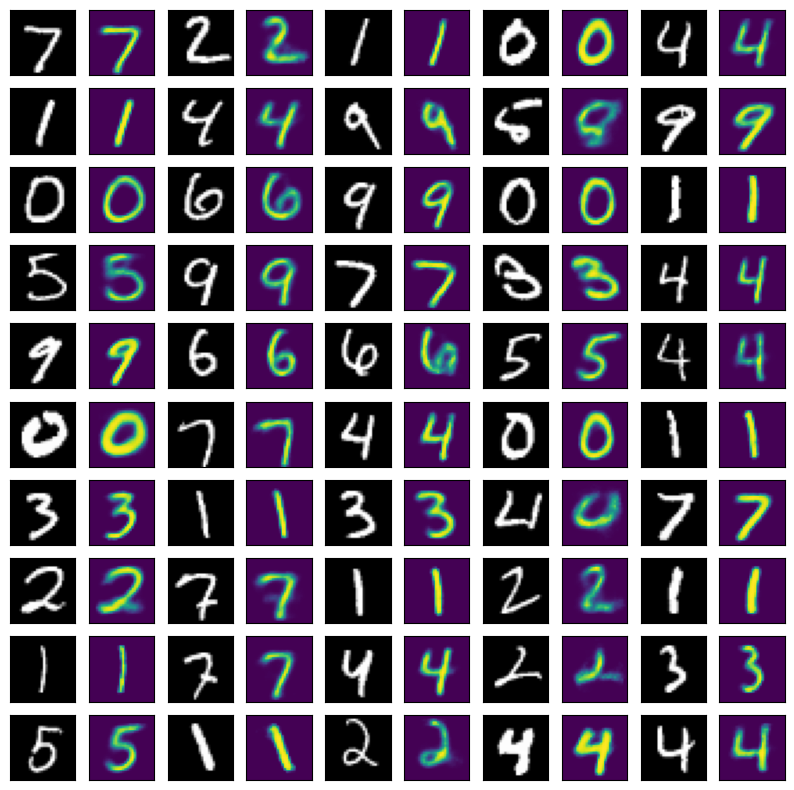

In [4]:
from matplotlib import pyplot as plt
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

Question3

In [6]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 20# this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 20)                2020      
                                                                 
 dense_12 (Dense)            (None, 100)               2100      
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

In [7]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [9]:
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)

Epoch 1/10
469/469 [==============================] - 41s 81ms/step - loss: 0.1864 - val_loss: 0.1336
Epoch 2/10
469/469 [==============================] - 35s 74ms/step - loss: 0.1242 - val_loss: 0.1161
Epoch 3/10
469/469 [==============================] - 36s 77ms/step - loss: 0.1131 - val_loss: 0.1089
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.1071 - val_loss: 0.1046
Epoch 5/10
469/469 [==============================] - 37s 78ms/step - loss: 0.1029 - val_loss: 0.1006
Epoch 6/10
469/469 [==============================] - 30s 63ms/step - loss: 0.1001 - val_loss: 0.0984
Epoch 7/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0982 - val_loss: 0.0974
Epoch 8/10
469/469 [==============================] - 35s 74ms/step - loss: 0.0967 - val_loss: 0.0963
Epoch 9/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0955 - val_loss: 0.0950
Epoch 10/10
469/469 [==============================] - 37s 77ms/step - loss: 0.094

313/313 [==============================] - 5s 14ms/step


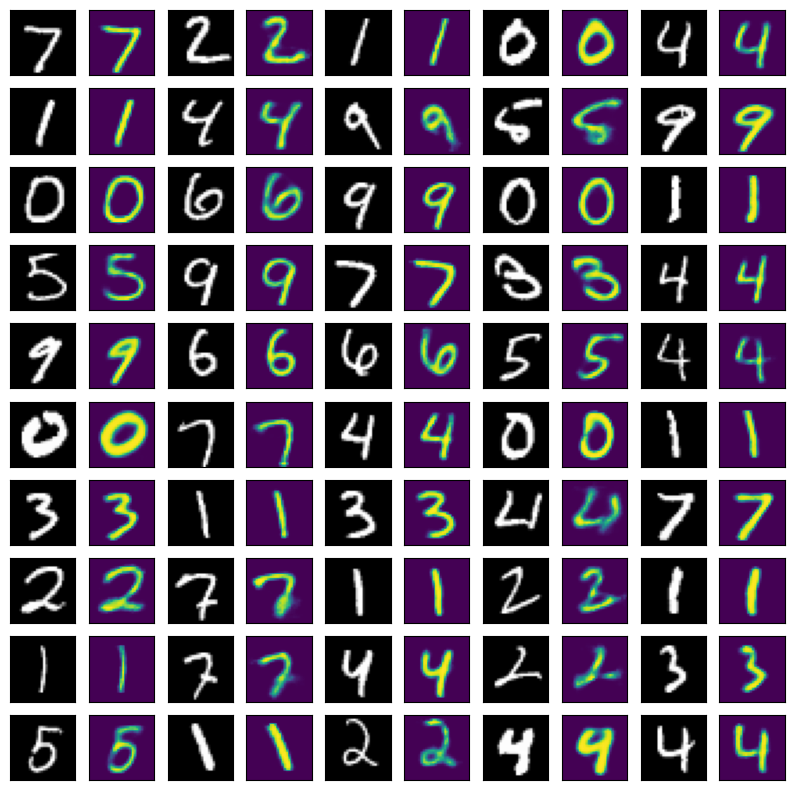

In [10]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [12]:
import os
from tensorflow.keras.preprocessing.image import load_img

from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

image_size = (28, 28)

dir = '/Users/sudeepchaudary/Desktop/DSP'


files = os.listdir(dir)
initial = []

for filename in files:
    file = load_img(os.path.join(dir, filename), target_size=(28,28),color_mode="grayscale")
    initial.append(np.array(file))

initial=np.vstack([initial])

images = np.array(initial).reshape(5,784) / 255.0
images = np.array([images])


In [13]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [14]:
images=images.reshape(-1,784)

In [15]:
np.random.shuffle(train_images)

bad_images = np.repeat(images, 10, axis=0)
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

In [21]:
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping 


early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=new_images_train, 
    y=new_images_train, 
    epochs=20, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

Epoch 1/20
1/1 [==============================] - 1s 593ms/step - loss: 0.1025 - val_loss: 0.1302
Epoch 2/20
1/1 [==============================] - 0s 229ms/step - loss: 0.0995 - val_loss: 0.1290
Epoch 3/20
1/1 [==============================] - 0s 262ms/step - loss: 0.0975 - val_loss: 0.1273
Epoch 4/20
1/1 [==============================] - 0s 212ms/step - loss: 0.0950 - val_loss: 0.1261
Epoch 5/20
1/1 [==============================] - 0s 247ms/step - loss: 0.0928 - val_loss: 0.1247
Epoch 6/20
1/1 [==============================] - 0s 290ms/step - loss: 0.0907 - val_loss: 0.1234
Epoch 7/20
1/1 [==============================] - 0s 258ms/step - loss: 0.0888 - val_loss: 0.1223
Epoch 8/20
1/1 [==============================] - 1s 620ms/step - loss: 0.0870 - val_loss: 0.1213
Epoch 9/20
1/1 [==============================] - 0s 349ms/step - loss: 0.0852 - val_loss: 0.1205
Epoch 10/20
1/1 [==============================] - 0s 348ms/step - loss: 0.0838 - val_loss: 0.1194
Epoch 11/20
1/1 [==

14/14 [==============================] - 0s 18ms/step
(440, 784)


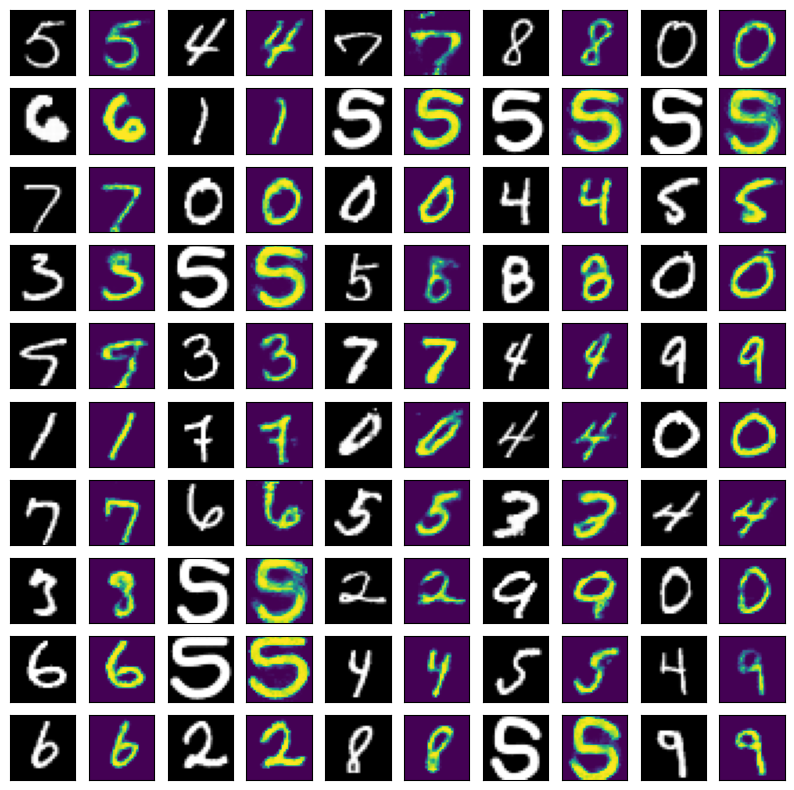

In [22]:
reconstructed_images = autoencoder.predict(new_images_test)
print(reconstructed_images.shape)

images = []
for i in range(100):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

In [23]:
autoencoder.save('sudeepencoder.h5')

Auto Encoder has performed well in predicting the letters provided and digits from mnist dataset.